In [4]:
import wandb
import pandas as pd
from matplotlib import pyplot as plt

import textwrap
from src.data.utils import download_wandb_table
from src.visualization.visualize import latexify


In [5]:
ENTITY = "mikeamerrill"
PROJECT = "generalized-ts-models"
RUN_ID = "xonwkg33"
TABLE_NAME = "val_results"

In [6]:
df = download_wandb_table(entity = ENTITY, project = PROJECT, run_id = RUN_ID, 
                          table_name=TABLE_NAME)

wandb:   1 of 1 files downloaded.  


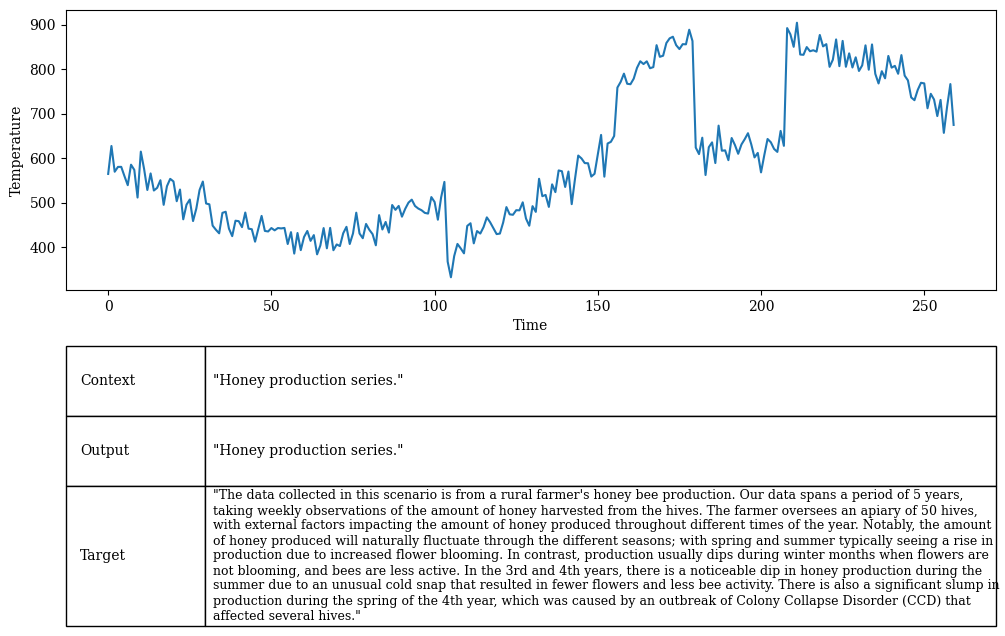

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import inset_locator

with plt.style.context("src/visualization/stylesheets/paper.mplstyle"):
    IDX = 3
    item = df.iloc[IDX]
    # Create a figure and main axes
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 8))

    # Create some sample data and plot it
    ax1.plot(item["ts"])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Temperature")


    col_labels = ['Context','Output', 'Target']
    table_vals = [item["context"], item["result"], item["label"]]
    table_vals = [f"\"{item.strip()}\"" for item in table_vals]
    # wrap the text
    # table_vals = ["\n".join(textwrap.wrap(row,width=CHARS_PER_LINE)) for row in table_vals]

    axins = ax2
    table_data = list(zip(col_labels, table_vals))
    table = axins.table(cellText=table_data, loc='center',cellLoc='left')

    # Style the table


    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.)  # Adjust the scaling factor as needed
    # table.AXESPAD = 0.1

    for i, key in enumerate(table.get_celld().keys()):
        cell = table[key]
        if i % 2 == 0:
            cell.set_width(0.15)
            
        else:
            cell.set_width(0.85)
            cell.PAD = 0.01

        if i > 3:
            cell.set_height(0.5)  # Adjust cell height for wrapping
        else:
            cell.set_height(0.25)
        # if i == 0:
        #     # Header cells
        #     cell.set_text_props(weight='bold')
        #     cell.set_fontsize(14)
        
        # cell.set_edgecolor('w')  # White cell borders for better visibility
        cell.set_text_props(multialignment='left', va = "center", wrap=True,)  # Center-align text

        if i == 5:
            cell.set_fontsize(9)

        

    # Remove the axes ticks and labels for the inset axes
    axins.axis('off')

plt.savefig("reports/2023/results.pdf", bbox_inches='tight')